## 1.  Load Library

In [ ]:
pip install pandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
sns.set_style('whitegrid')

### Library untuk preprocessing text

In [ ]:
pip install Sastrawi

In [ ]:
# Library untuk preprocessing text
import csv
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## library untuk vectorized
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## Library untuk pemodelan klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

## Library untuk evaluasi
from sklearn .metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pd.set_option('max_colwidth',180)

## 2. Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Project/data-modul2/TWS_sentiment.csv', sep=';', encoding='utf-8')
df.head(15)

,ulasan,rully,cheva,najib,sentiment
0,berfungsi dengan baik. Joss,p,p,p,positive
1,"bagus, barang sesuai deskripsi",p,p,p,positive
2,Packing aman dan kondisi diterima dengan normal,p,p,p,positive
3,pengiriman cepat dan barang ok banget,p,p,p,positive
4,bagus sesuai dengan gambar,p,p,p,positive
5,brg bagus tq 👍,p,p,p,positive
6,Kualitas sangat bagus 👍,p,p,p,positive
7,mantap,p,p,p,positive
8,"packing nya kaya ga aman, ga ada bublewarpnya, dicoba sih bagus, smoga awet batery nya terimakasih",n,n,n,negative
9,Barang sesuai. pengiriman cepat,p,p,p,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ulasan     34 non-null     object
 1   rully      34 non-null     object
 2   cheva      34 non-null     object
 3   najib      34 non-null     object
 4   sentiment  34 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


## 3. Explore Data

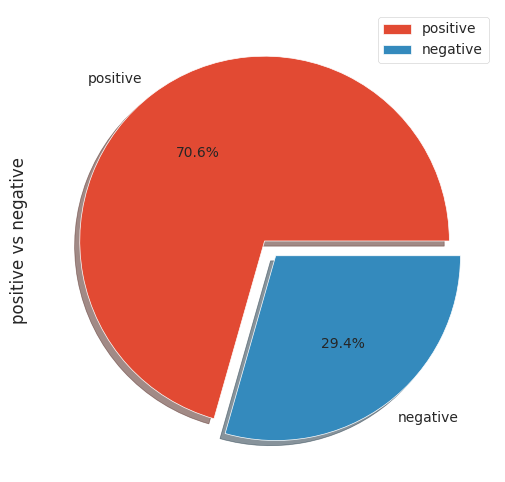

In [ ]:
df["sentiment"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize =(6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("positive vs negative")
plt.legend(["positive", "negative"])
plt.show()

In [ ]:
df['length'] = df['ulasan'].apply(len)
df.head(11)

,ulasan,rully,cheva,najib,sentiment,length
0,berfungsi dengan baik. Joss,p,p,p,positive,27
1,"bagus, barang sesuai deskripsi",p,p,p,positive,30
2,Packing aman dan kondisi diterima dengan normal,p,p,p,positive,47
3,pengiriman cepat dan barang ok banget,p,p,p,positive,37
4,bagus sesuai dengan gambar,p,p,p,positive,26
5,brg bagus tq 👍,p,p,p,positive,14
6,Kualitas sangat bagus 👍,p,p,p,positive,23
7,mantap,p,p,p,positive,6
8,"packing nya kaya ga aman, ga ada bublewarpnya, dicoba sih bagus, smoga awet batery nya terimakasih",n,n,n,negative,98
9,Barang sesuai. pengiriman cepat,p,p,p,positive,31


In [ ]:
df["ulasanLength"] = df["ulasan"].apply(len)
df["ulasanLength"].describe()

count     34.000000
mean      62.911765
std       52.334801
min        6.000000
25%       25.250000
50%       42.000000
75%       94.750000
max      174.000000
Name: ulasanLength, dtype: float64

#  World Cloud
Wordcloud adalah representasi visual dari kumpulan kata-kata di mana ukuran kata menunjukkan frekuensinya atau kepentingannya. Dalam wordcloud, kata-kata yang muncul lebih sering dalam teks mendapatkan ukuran yang lebih besar dan seringkali ditampilkan dalam berbagai warna atau layout yang menarik.

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud

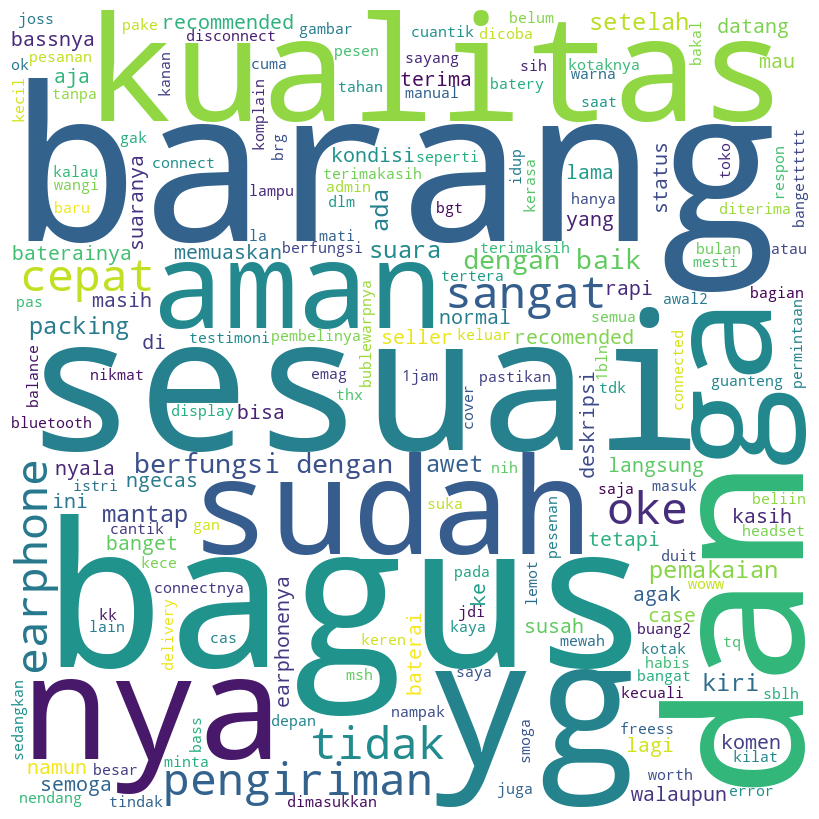

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv('/content/drive/MyDrive/Colab Project/data-modul2/TWS_sentiment.csv', sep=';', encoding='utf-8')

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.ulasan:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## 4. Cleaning Data

In [ ]:
def clean_text(text):
  # mengubah semua karakter huruf menjadi huruf keciLl
  text = text.lower()
  # menghilangkan Nama Akun
  text = re.sub('@[^\s]+', '', text)
  # menghilangkan punctuation
  # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  # menghilangkan angka
  text = re.sub('\w*\d\w*', '',text)
  # menghilangkan URL
  text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
  text = re.sub(r'(https?:\/\/)?({\da-z\.-]+)\.([a-z\.]{2,6})([\/\W\.-]*)*\/?\S', '', text)
  # menghilangkan Hastag
  text = re.sub('#[*\s]+', '', text)
  # Menghilangkan emoticon
  emoticon_pattern = re.compile(u'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+', flags=re.UNICODE)
  text = emoticon_pattern.sub(r'', text)
  # menghilangkan Huruf Tunggal
  text = re.sub(r'\b[a-zA-Z]\b', '', text)

  return text

clean = lambda x: clean_text(x)

In [ ]:
dfx = pd.DataFrame(df.ulasan.apply(clean))
dfx.head(15)

,ulasan
0,berfungsi dengan baik. joss
1,"bagus, barang sesuai deskripsi"
2,packing aman dan kondisi diterima dengan normal
3,pengiriman cepat dan barang ok banget
4,bagus sesuai dengan gambar
5,brg bagus tq
6,kualitas sangat bagus
7,mantap
8,"packing nya kaya ga aman, ga ada bublewarpnya, dicoba sih bagus, smoga awet batery nya terimakasih"
9,barang sesuai. pengiriman cepat


### Menghapus tanda baca (punctuation)

In [ ]:
def Punctuation(string):
  punctuations = '''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''

  for x in string.lower():
    if x in punctuations:
      string = string.replace(x," ")
  return (string)

cleanPunc = lambda x : Punctuation(x)

In [ ]:
dfx = pd.DataFrame(dfx.ulasan.apply(cleanPunc))
dfx.head(15)

,ulasan
0,berfungsi dengan baik joss
1,bagus barang sesuai deskripsi
2,packing aman dan kondisi diterima dengan normal
3,pengiriman cepat dan barang ok banget
4,bagus sesuai dengan gambar
5,brg bagus tq
6,kualitas sangat bagus
7,mantap
8,packing nya kaya ga aman ga ada bublewarpnya dicoba sih bagus smoga awet batery nya terimakasih
9,barang sesuai pengiriman cepat


### Menghapus kata slang bahasa Indonesia

In [ ]:
import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

# Load the colloquial Indonesian lexicon
url = "https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv"
colloquial_lexicon = pd.read_csv(url)
new_entries = [
    {'slang': 'joss', 'formal': 'mantap'},
    {'slang': 'tq', 'formal': 'thank you'},
    {'slang': 'ok', 'formal': 'oke'},
    {'slang': 'freess', 'formal': 'fresh'},
    {'slang': 'emag', 'formal': 'emang'},
    {'slang': 'thx', 'formal': 'thanks'},
    {'slang': 'kece', 'formal': 'keren'},
    {'slang': 'duit', 'formal': 'uang'},
    {'slang': 'batery', 'formal': 'baterai'},
]
new_entry_df = pd.DataFrame(new_entries)
colloquial_lexicon = pd.concat([colloquial_lexicon, new_entry_df], ignore_index=True)

def remove_slang(text, lexicon):
    tokens = word_tokenize(text)
    result_tokens = []

    for token in tokens:
        # Check if the token is in the lexicon
        if token.lower() in lexicon['slang'].values:
            index_slang = lexicon['slang'] == token.lower()
            formal = list(set(lexicon.loc[index_slang, 'formal']))
            if len(formal) == 1:
                result_tokens.append(formal[0])
            else:
                result_tokens.append(token)  # Keep the original token if there's no clear formal equivalent
        else:
            result_tokens.append(token)

    result_text = ' '.join(result_tokens)
    return result_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
dfx['ulasan'] = dfx['ulasan'].apply(lambda x: remove_slang(x, colloquial_lexicon))
dfx

,ulasan
0,berfungsi dengan baik mantap
1,bagus barang sesuai deskripsi
2,packing aman dan kondisi diterima dengan normal
3,pengiriman cepat dan barang oke banget
4,bagus sesuai dengan gambar
5,bareng bagus thank you
6,kualitas sangat bagus
7,mantap
8,packing nya kayak enggak aman enggak ada bublewarpnya dicoba sih bagus semoga awet baterai nya terimakasih
9,barang sesuai pengiriman cepat


## 5. Stopword Removal

Fungsi Stopword Removal adalah proses menghapus kata-kata umum yang sering muncul dan tidak memberikan kontribusi signifikan terhadap pemahaman teks. Biasanya, stop words seperti "the", "is", "and", "in", dll., dihapus karena mereka tidak membawa banyak informasi untuk analisis teks. NLTK (Natural Language Toolkit) adalah salah satu pustaka yang umum digunakan untuk melakukan Stopword Removal dalam bahasa Python.

In [ ]:
def get_stopword(stopwordsfile):
  stopwords=[]
  file_stopwords = open(stopwordsfile,'r')
  row = file_stopwords.readline()
  while row:
    word = row.strip()
    stopwords. append (word)
    row = file_stopwords.readline()
  file_stopwords.close()
  return stopwords

In [ ]:
stop_words_indo = get_stopword('/content/drive/MyDrive/Colab Project/data-modul2/id.stopwords.02.01.2016.txt')

In [ ]:
def stopwords(text):

  tokens = word_tokenize(text)
  filtered = []

  for w in tokens:
    if w not in stop_words_indo:
      filtered. append (w)

  hasil = ' '.join(filtered)
  return hasil

st = lambda x: stopwords(x)

In [ ]:
import nltk
nltk.download('punkt')

dfx = pd.DataFrame(dfx.ulasan.apply(st))
dfx

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ulasan
0,berfungsi mantap
1,bagus barang sesuai deskripsi
2,packing aman kondisi diterima normal
3,pengiriman cepat barang oke banget
4,bagus sesuai gambar
5,bareng bagus thank you
6,kualitas bagus
7,mantap
8,packing nya kayak aman bublewarpnya dicoba sih bagus semoga awet baterai nya terimakasih
9,barang sesuai pengiriman cepat


## 6. Stemming
Stemming adalah proses menghilangkan afiks (akhiran atau awalan) dari kata sehingga hanya menyisakan bentuk dasar atau kata dasar. Ini membantu mengurangi variasi kata ke bentuk dasarnya dan meningkatkan konsistensi dalam analisis teks.

In [ ]:
def stemming(text):

  factory_stem = StemmerFactory()
  stemmer = factory_stem.create_stemmer()
  text = stemmer.stem(text)
  return text

stem = lambda x: stemming(x)

In [ ]:
dfx = pd.DataFrame(dfx.ulasan.apply(stem))
dfx.head(15)

,ulasan
0,fungsi mantap
1,bagus barang sesuai deskripsi
2,packing aman kondisi terima normal
3,kirim cepat barang oke banget
4,bagus sesuai gambar
5,bareng bagus thank you
6,kualitas bagus
7,mantap
8,packing nya kayak aman bublewarpnya coba sih bagus moga awet baterai nya terimakasih
9,barang sesuai kirim cepat


In [ ]:
dfx["sentiment"] = df["sentiment"]
dfx.head(15)

,ulasan,sentiment
0,fungsi mantap,positive
1,bagus barang sesuai deskripsi,positive
2,packing aman kondisi terima normal,positive
3,kirim cepat barang oke banget,positive
4,bagus sesuai gambar,positive
5,bareng bagus thank you,positive
6,kualitas bagus,positive
7,mantap,positive
8,packing nya kayak aman bublewarpnya coba sih bagus moga awet baterai nya terimakasih,negative
9,barang sesuai kirim cepat,positive


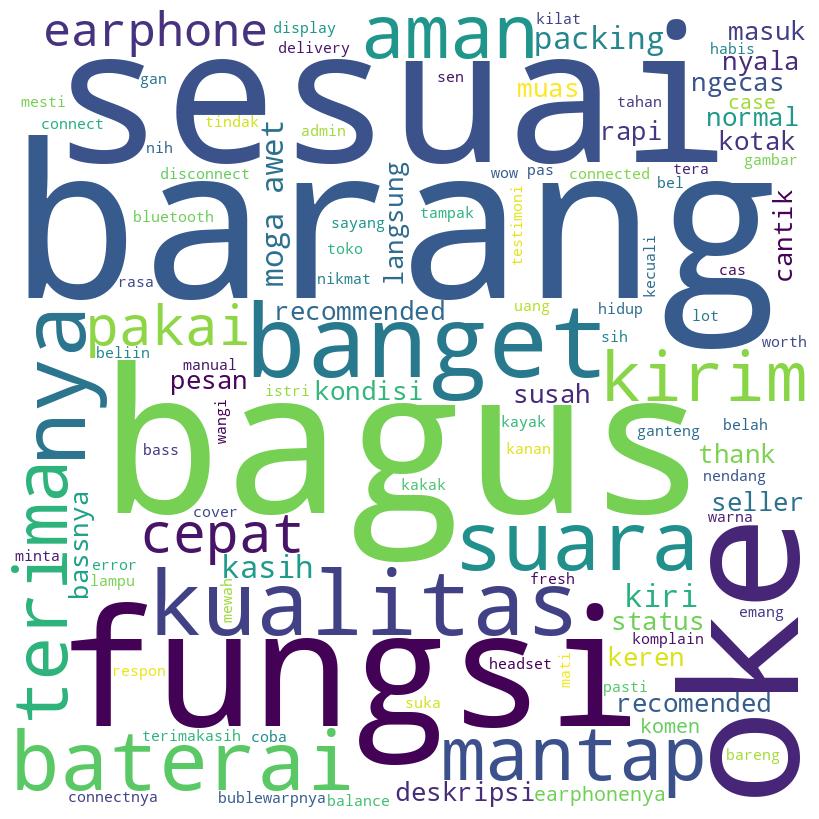

In [ ]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in dfx.ulasan:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white',
                      stopwords = stopwords,
                      min_font_size = 10.).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## 7. Vectorized
Vektorisasi digunakan untuk mempercepat kode Python tanpa menggunakan perulangan. Menggunakan fungsi seperti itu dapat membantu meminimalkan waktu berjalannya kode secara efisien. Berbagai operasi dilakukan pada vektor seperti dot product dari vektor yang juga dikenal sebagai produk skalar karena menghasilkan output tunggal, produk luar yang menghasilkan matriks persegi berdimensi sama dengan panjang X panjang vektor, perkalian bijak elemen yang menghasilkan elemen dengan indeks yang sama dan dimensi matriks tidak berubah.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

## Skenario text size 90:10

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, strip_accents='ascii')
y = dfx.sentiment
X = dfx.ulasan

# Membagi data menjadi set traning dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=31)

In [ ]:
# Memakai undersampling
sampler = RandomUnderSampler(random_state=10)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train.values.reshape(-1, 1), y_train)

# Mengonversi data yang disampling
X_train_resampled = pd.Series(X_train_resampled.flatten())

In [ ]:
# Vectorize the text data
X_train_vect = vectorizer.fit_transform(X_train_resampled)
X_test_vect = vectorizer.transform(X_test)

# Train the Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_vect, y_train_resampled)

# Make predictions on the test set
y_pred = mnb.predict(X_test_vect)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print
print(f"Accuracy: {accuracy}")

# Calculate confusion matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 3]]
Precision: 1.0000
Recall: 1.0000


In [ ]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         1
    positive       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## Skenario text size (80:20)

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, strip_accents='ascii')
y = dfx.sentiment
X = dfx.ulasan

# Membagi data menjadi set traning dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [ ]:
# Memakai undersampling
sampler = RandomUnderSampler(random_state=10)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train.values.reshape(-1, 1), y_train)

# Mengonversi data yang disampling
X_train_resampled = pd.Series(X_train_resampled.flatten())

In [ ]:
# Vectorize the text data
X_train_vect = vectorizer.fit_transform(X_train_resampled)
X_test_vect = vectorizer.transform(X_test)

# Train the Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_vect, y_train_resampled)

# Make predictions on the test set
y_pred = mnb.predict(X_test_vect)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print
print(f"Accuracy: {accuracy}")

# Calculate confusion matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.8571428571428571
Confusion Matrix:
[[1 0]
 [1 5]]
Precision: 0.9286
Recall: 0.8571


In [ ]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       1.00      0.83      0.91         6

    accuracy                           0.86         7
   macro avg       0.75      0.92      0.79         7
weighted avg       0.93      0.86      0.87         7



## Skenario text size (70:30)

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, strip_accents='ascii')
y = dfx.sentiment
X = dfx.ulasan

# Membagi data menjadi set traning dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [ ]:
# Memakai undersampling
sampler = RandomUnderSampler(random_state=10)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train.values.reshape(-1, 1), y_train)

# Mengonversi data yang disampling
X_train_resampled = pd.Series(X_train_resampled.flatten())

In [ ]:
# Vectorize the text data
X_train_vect = vectorizer.fit_transform(X_train_resampled)
X_test_vect = vectorizer.transform(X_test)

# Train the Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_vect, y_train_resampled)

# Make predictions on the test set
y_pred = mnb.predict(X_test_vect)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print
print(f"Accuracy: {accuracy}")

# Calculate confusion matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.5454545454545454
Confusion Matrix:
[[1 1]
 [4 5]]
Precision: 0.7182
Recall: 0.5455


In [ ]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.20      0.50      0.29         2
    positive       0.83      0.56      0.67         9

    accuracy                           0.55        11
   macro avg       0.52      0.53      0.48        11
weighted avg       0.72      0.55      0.60        11



###  Cross Validation Accuracy (bisa disesuaikan dgn skenario)

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Contoh data
X = dfx.ulasan
y = dfx.sentiment

# Membagi data menjadi set traning dan testing (sesuai skenario)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=31)

# Memakai undersampling
sampler = RandomUnderSampler(random_state=10)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train.values.reshape(-1, 1), y_train)

# Mengonversi data yang disampling
X_train_resampled = pd.Series(X_train_resampled.flatten())

# Vectorize the text data
vectorizer = TfidfVectorizer(use_idf=True, strip_accents='ascii')
X_train_vect = vectorizer.fit_transform(X_train_resampled)
X_test_vect = vectorizer.transform(X_test)

# Inisialisasi model Naive Bayes
mnb = MultinomialNB()

# Lakukan cross-validation dan hitung skor akurasi
cv_scores = cross_val_score(mnb, X_train_vect, y_train_resampled, cv=5, scoring='accuracy')

# Tampilkan skor akurasi rata-rata dari cross-validation
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

# Train the Multinomial Naive Bayes classifier
mnb.fit(X_train_vect, y_train_resampled)

# Make predictions on the test set
y_pred = mnb.predict(X_test_vect)

# Evaluate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")

Cross-Validation Accuracy: 0.7833
Accuracy on Test Set: 1.0000


### **KESIMPULAN**

1. Skenario test size (90:10) dan random state = 31 :
- Accuracy = 1.0 (menunjukkan bahwa model tidak membuat kesalahan sama sekali)
- Precision = 1.0000
- Recall = 1.0000

================================================================================

2. Skenario test size (80:20) dan random state = 31 :
- Accuracy = 0.8571428571428571 (menunjukkan bahwa model membuat kesalahan 14.29%.)
- Precision = 0.9286
- Recall = 0.8571

================================================================================

2. Skenario test size (70:30) dan random state = 31 :
- Accuracy = 0.5454545454545454 (menunjukkan bahwa model membuat kesalahan 45.45%)
- Precision: 0.7182
- Recall: 0.5455